In [1]:
import modelarch
import segmentXAIensembler as sxe

# Load parameters defined in params.py
import params

In [2]:
# Define column names for the visualization
col_names = ["Original", "Mask", "Predicted mask"] + list(filter(lambda x: x in params.XAI_methods, sxe.all_available_methods)) + ["Ensembled XAI"]
col_names

['Original',
 'Mask',
 'Predicted mask',
 'IntegratedGradients',
 'Saliency',
 'DeepLift',
 'Ensembled XAI']

In [3]:
# Load the training dataset and create a data loader
train_dataset = sxe.ImageNet_Dataset(params, root_path=params.root_path, phase='train')
train_loader = sxe.DataLoader(train_dataset, batch_size=params.batch_size, shuffle=True)
sxe.logging.info('Size of the train dataset : {}'.format(len(train_dataset)))

# Load the validation dataset and create a data loader
valid_dataset = sxe.ImageNet_Dataset(params, root_path=params.root_path, phase='valid')
valid_loader = sxe.DataLoader(valid_dataset, batch_size=params.batch_size, shuffle=True)
sxe.logging.info('Size of the valid dataset : {}'.format(len(valid_dataset)))

2023-08-07 20:10:58,798 [INFO] Size of the train dataset : 8
2023-08-07 20:10:58,809 [INFO] Size of the valid dataset : 2


/raid/shared/anonymous/miniconda3/envs/torch-gpu/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/raid/shared/anonymous/miniconda3/envs/torch-gpu/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


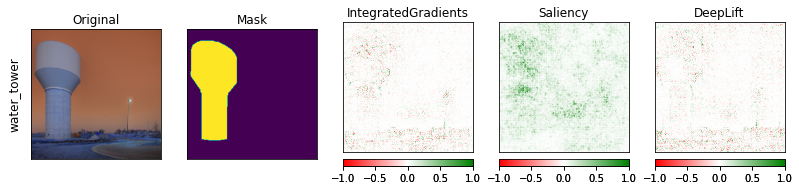

In [4]:
# Show an example validation with visualization
sxe.show_example(params, valid_dataset, col_names)

In [ ]:
# Train the model using the training dataset and validate using the validation dataset
sxe.train(params, train_loader, train_dataset, valid_loader, valid_dataset, col_names)

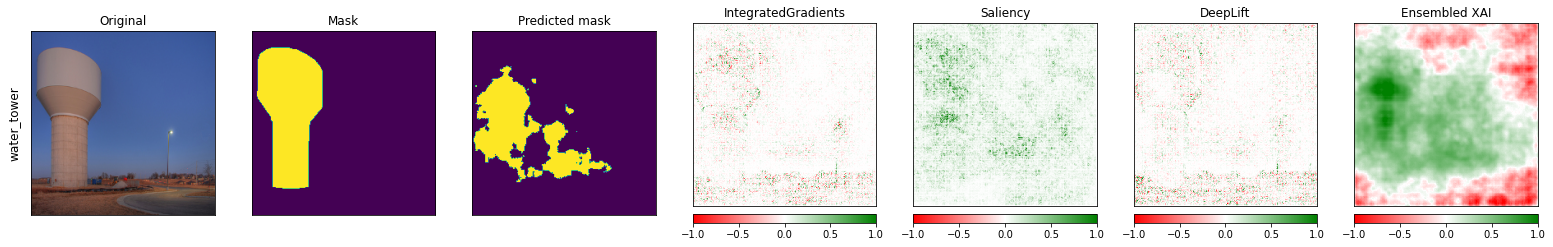

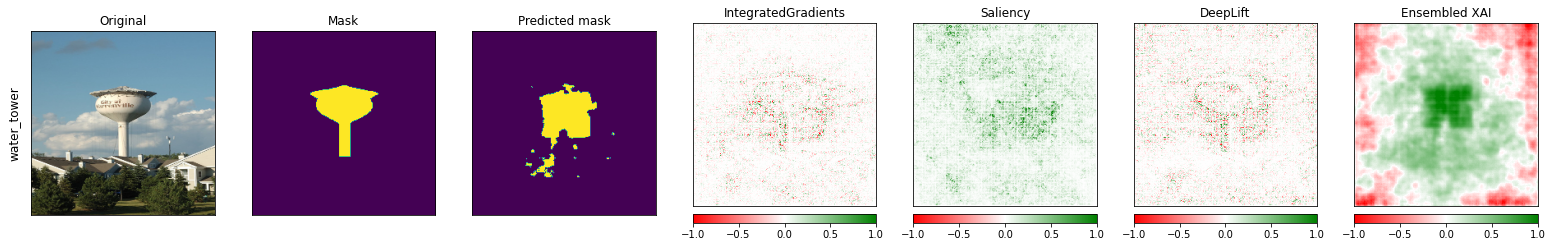

In [6]:
# Visualize the results on the validation dataset
sxe.visualize_results(valid_dataset, col_names)

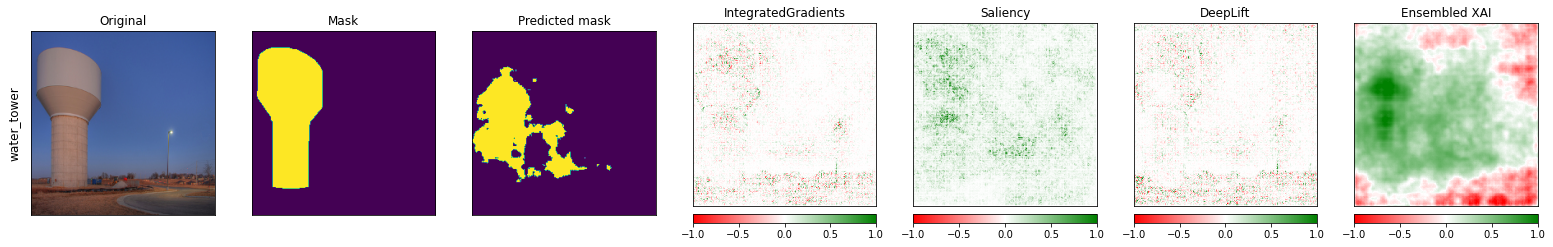

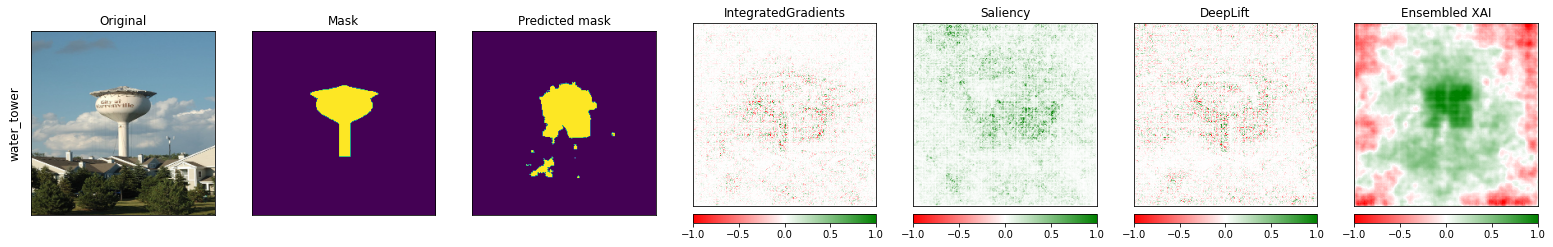

In [7]:
# Load the ensemble model defined in params
model = modelarch.CE_Net_(params).to(params.device)

# Load image, label, mask, and explanation
x_batch, y_batch, s_batch, a_batch = sxe.retrieve_data(params)

In [8]:
# Perform an example validation using the Quantus library
attrs = sxe.EnsembledXAI_explainer(model=model, inputs=x_batch, targets=y_batch, **{"device": params.device})
attrs.shape

(2, 1, 224, 224)